In [1]:
import os
from pathlib import Path
import csv
import matplotlib.pyplot as plt

def visualize_plot(csv_path):
    t = []
    velocity = []

    with open(csv_path, 'r') as log_result:
        lines = csv.reader(log_result, delimiter=',')
        header = []

        for index, row in enumerate(lines):
            if index != 0:
                t.append(float(row[0]))
                velocity.append(float(row[3]))
    
    plt.plot(t, velocity)
    plt.grid(visible=True)
    plt.ylim([0,110])

    plt.show()


In [2]:


cur_file_path = os.path.abspath('')
csv_root_path = Path(cur_file_path)
csv_file_name = "20241002_121024_global.csv"

csv_path = os.path.join(csv_root_path, csv_file_name)


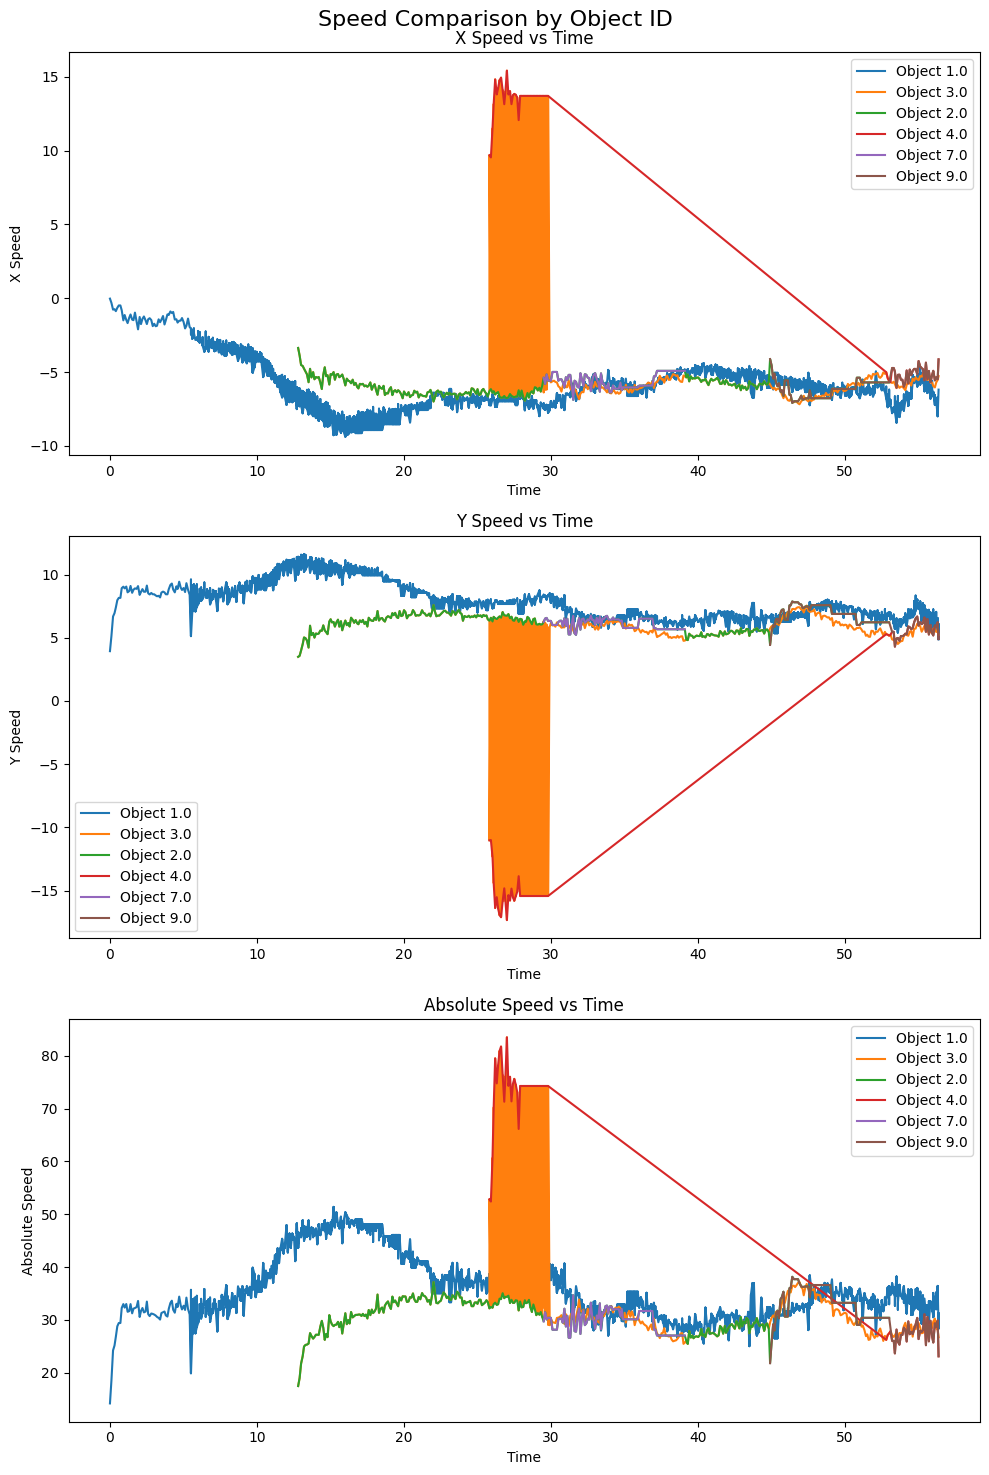

In [4]:
### GPT
import pandas as pd
df = pd.read_csv(csv_path)

# 데이터를 객체 id별로 분류
objects = {}
for _, row in df.iterrows():
    object_id = row['ID']
    if object_id not in objects:
        objects[object_id] = {'Stamp': [], 'global vel x [m/s]': [], 'global vel y [m/s]': [], 'velocity [km/h]': []}
    objects[object_id]['Stamp'].append(row['Stamp'])
    objects[object_id]['global vel x [m/s]'].append(row['global vel x [m/s]'])
    objects[object_id]['global vel y [m/s]'].append(row['global vel y [m/s]'])
    objects[object_id]['velocity [km/h]'].append(row['velocity [km/h]'])

# 그래프 그리기
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('Speed Comparison by Object ID', fontsize=16)

# 각 객체 id별로 그래프 생성
for object_id, values in objects.items():
    axs[0].plot(values['Stamp'], values['global vel x [m/s]'], label=f'Object {object_id}')
    axs[1].plot(values['Stamp'], values['global vel y [m/s]'], label=f'Object {object_id}')
    axs[2].plot(values['Stamp'], values['velocity [km/h]'], label=f'Object {object_id}')

# 그래프 제목 및 라벨 설정
axs[0].set_title('X Speed vs Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('X Speed')
axs[0].legend()

axs[1].set_title('Y Speed vs Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Y Speed')
axs[1].legend()

axs[2].set_title('Absolute Speed vs Time')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Absolute Speed')
axs[2].legend()

# 그래프 출력
plt.tight_layout()
plt.show()